## 获取数据

In [1]:
import pymysql
import  pandas as pd

In [2]:
db = pymysql.connect(host='210.45.212.126', user='lemon', password='Bigdata0217', port=3306)

In [3]:
cursor = db.cursor()

In [4]:
sql = "SELECT uid, weibo_cont, create_time, repost_num, comment_num, praise_num FROM `weibo`.`weibo_data` WHERE create_time > '2018-08-24 00:00' and create_time < '2018-09-20 00:00'"
cursor.execute(sql)

1500

In [5]:
display_columes = ['uid', 'weibo_cont', 'create_time', 'repost_num', 'comment_num', 'praise_num']
res = cursor.fetchall()
data_df = pd.DataFrame(list(res), columns=display_columes)

In [6]:
sql2 = "SELECT uid,`name`, gender,verify_type, verify_info  FROM `weibo`.`wbuser`"
cursor.execute(sql2)

1517

In [7]:
res2 = cursor.fetchall()
display_columes2 = ['uid','name', 'gender','verify_type', 'verify_ibbnfo']
user_df = pd.DataFrame(list(res2), columns=display_columes2)

In [13]:
res_df = pd.merge(data_df, user_df)
res_df.to_csv('result.csv',index=None)


## 处理数据

In [17]:
result = pd.read_csv('result.csv')
result['create_time'] = pd.to_datetime(result['create_time'])

In [18]:
# 引爆点分析
top_10 = result.sort_values(by=['repost_num', 'comment_num', 'praise_num'], ascending=[False, False, False])[:10]
top_10

,Unnamed: 0,uid,weibo_cont,create_time,repost_num,comment_num,praise_num,name,gender,verify_type,verify_ibbnfo
77,77,2087169013,#人神共愤#【司机群内侮辱乐清滴滴遇害者，烟台警方行政拘留2人】24日，20岁的乐清姑娘小赵...,2018-08-29 12:56:00,40266,69625,198132,法制日报,0,2,法制日报官方微博
338,338,1749990115,【#顺风车司机直播女乘客#试图牟利 言语骚扰博关注 弹幕评论下流】女孩乘坐顺风车遇害案尚在舆...,2018-08-29 09:57:00,10942,21768,32324,北京青年报,0,2,北京青年报官方微博
1337,1337,2763342602,#警情通报#“乐清女孩滴滴顺风车遇害案”案发后，QQ昵称为“幸运星”的网民在千余人的“武汉滴...,2018-08-27 22:56:00,3929,3346,13261,平安蔡甸,0,2,武汉市公安局蔡甸区分局官方微博
85,85,1642088277,【交通部刊文批滴滴：对法律没有敬畏心 丢失安全底线 藐视生命】#交通部批滴滴#接二连三的事件...,2018-08-27 11:21:00,1226,2206,8977,财经网,0,2,财经网官方微博
621,621,3266943013,【#顺风车司机暗中直播女乘客#：言语骚扰博关注，弹幕评论下流】女孩乘坐顺风车遇害案尚在舆论漩...,2018-08-29 09:52:00,812,2009,3948,央视网,0,2,央视国际网络有限公司
30,30,2510158274,乐清滴滴顺风车遇害事件发生后，滴滴仅发文字致歉声明，派工作人员向家属致歉，创始人程维至今未曾...,2018-09-03 12:26:00,461,132,117,老宁说,1,1,上海通联科技发展有限公司 高级顾问 知名互联网资讯博主 微博签约自媒体
416,416,1638782947,【顺风车奸杀案嫌犯16岁女友讲述：案发前“他在网上搜强奸杀人会怎么样”】24日，浙江省乐清市...,2018-08-28 09:53:00,420,1744,3202,新浪财经,0,2,新浪财经官方微博
1382,1382,1644948230,【女子深夜搭网约车遭性侵险被灭口 目前疑犯仍在逃】在乐清20岁女孩搭乘滴滴顺风车遇害事件后，...,2018-08-31 15:30:00,390,393,393,法制晚报,0,2,《法制晚报》官方微博
1372,1372,1956700750,【乐清乘顺风车遇害女孩出殡前，#滴滴工作人员赴殡仪馆慰问遭拒#】8月24日，浙江乐清20岁女...,2018-09-02 17:11:00,350,1128,2389,电商报,0,2,电商报官方微博
869,869,5059529868,针对今日#顺风车司机暗中直播女乘客# 弹幕评论不堪入目！联想到之前空姐，#乐清女孩滴滴顺风车...,2018-08-29 16:15:00,307,311,26,新浪深圳科技频道,0,2,新浪深圳科技官方微博


In [ ]:
### 变化曲线

In [19]:
time_group = result.groupby(lambda x: result['create_time'][x].date()).size()

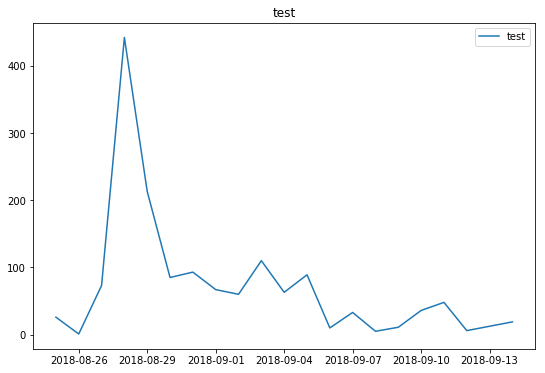

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(time_group.index, time_group.values, label='test')
plt.title('test')
plt.legend()
plt.show()